<a href="https://colab.research.google.com/github/Deepaksai1919/Spark/blob/DrAminKarami-Udemy/Working_With_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


For RDD, we need only `SparkContext`. For DataFrame, we need `SparkContext` and `SQLContext`. Both of them together is called `SparkSession`

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master('local[*]').getOrCreate()

spark

In [3]:
df = spark.read.format('csv').load('CompleteDataset.csv',inferSchema=True,header=True)

In [6]:
df.rdd.getNumPartitions()

2

In [8]:
df.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [10]:
df = df.withColumnsRenamed({
    '_c0': 'Row_ID',
    'Ball control': 'Ball_Control',
    'Sliding tackle': 'Sliding_Tackle'
})

df.show()

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|Row_ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK han

In [11]:
df = df.na.fill({'RAM': 10, 'RB': 1})

df.show(truncate=False)

+------+-----------------+---+-----------------------------------------------+-----------+-----------------------------------+-------+---------+-------------------+------------------------------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|Row_ID|Name             |Age|Photo                                          |Nationality|Flag                               |Overall|Potential|Club               |Club Logo                                 |Value |Wage |Special|Accel

In [12]:
df_result = df.filter('Overall > 70').groupBy('Age').count().sort('Age')

In [13]:
pd_df = df_result.toPandas()

<Axes: xlabel='Age'>

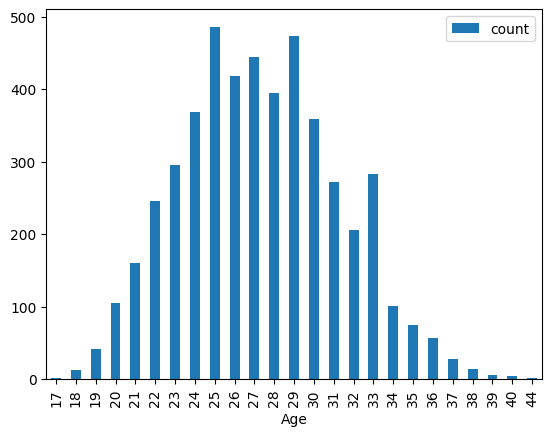

In [15]:
pd_df.plot(x='Age', y='count', kind='bar')

<Axes: xlabel='Age'>

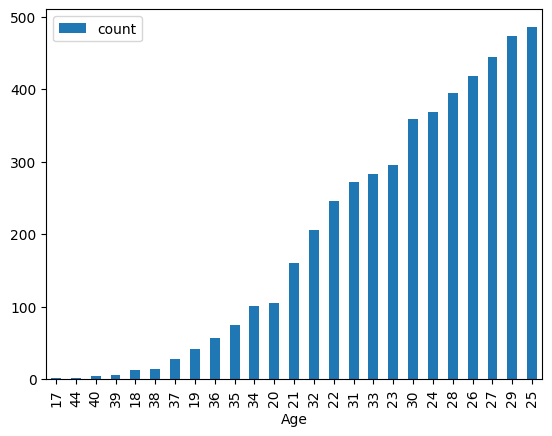

In [16]:
pd_df.sort_values(by='count').plot(x='Age', y='count', kind='bar')

<Axes: xlabel='Age'>

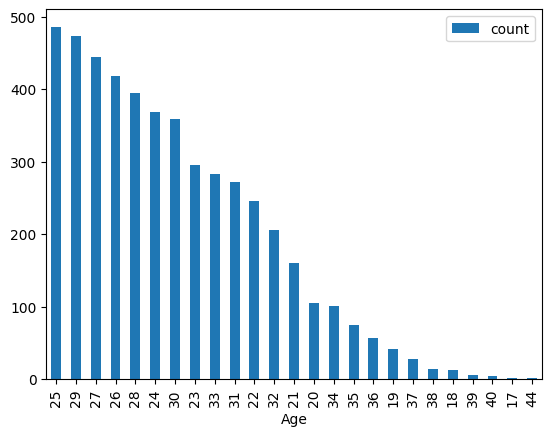

In [18]:
pd_df.sort_values(by='count', ascending=False).plot(x='Age', y='count', kind='bar')